<a href="https://colab.research.google.com/github/SolbiChoi/TeamProject/blob/master/living_bad_fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install konlpy wordcloud

In [ ]:
import pandas as pd
from konlpy.tag import Okt, Komoran, Kkma, Hannanum, Twitter, Mecab
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
text = pd.read_excel('./living_scraping.xlsx')
grade_2 = text['star grade'] <= 2.0

df_grade2 = text[grade_2]
df_grade2['star grade'].value_counts()

df_grade2.head(10)

,star grade,review
6,1.0,펀딩가보다 네이버 런칭가를 더 싸게 팔고\n사은품까지 주다니요?\n그럼 펀딩한 사람...
10,1.5,"제품은 좋은데 카카오 톡딜에 슬리브 증정으로 팔아버리네요, ㅎㅎㅎ 아 그리고 설명서..."
11,1.0,설명서가 한글매뉴얼 아닌건 알겠어요\n근데 카카오톡에 떡하니 톡딜로 더 싸게 파는건...
12,1.0,제품은 좋은데 마케팅방식이 맘에 안드네요. 펀딩의 매력은 좀 더 좋은 조건으로 일찍...
13,1.0,출시가가 저렴하다니요..\n펀딩하고 돈내고 시간 투자해서 기다린 사람들은 뭐가 됩니...
14,1.0,제품 잘쓰고 있다가 기분 나쁘네요. 주변에도 소개했었는데.. 출시가격이 펀딩가격과 ...
17,1.0,너무너무 맘에 드는 컵이에요. 근데 출시하고 더 좋은 조건으로 팔았다니... 그럴 ...
19,1.0,제품은 늘 그래왔듯 모슈! 만족합니다.\n하지만... 제가 구매한거 보고 어머니도 ...
21,2.0,엥 출시가가 저렴하면 펀딩 의미가 있나. ?\n제품은 이뻐요 잘 떨어트리는데 가드?...
22,1.0,출시가가 더 저렴하다니.... 굳이 펀딩한 의미가... 한글 설명서도 없고........


In [ ]:
x_data = text['review']
y_data = text['star grade']

In [ ]:
def make_y_data(val):
    if (1 <= val < 2):
        return 1
    elif (2 <= val < 3):
        return 2
    elif (3 <= val < 4):
        return 3
    elif (4 <= val < 5):
        return 4
    elif (5 <= val < 6):
        return 5
    else:
        return None

In [ ]:
y_data = y_data.apply(lambda val:make_y_data(val))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5641,), (5641,), (1881,), (1881,))

In [ ]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0  95547      0 --:--:-- --:--:-- --:--:-- 95547


In [ ]:
!bash ./mecab.sh

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [ ]:
x_train.str.replace('[^가-힣ㄱ-ㅎㅠ ]','')

819     잘 쓰고 있습니다이미 더러운 변기를 깨끗이 해주지는 않지만 변기 세척 후 사용해보니...
4049    그냥 혹해서 샀다가 청소기때문에 막상 잘 쓰진 않아요ㅎㅎ그냥저냥 쓸리는거 같습니다 ...
6019    정말 무책임한 회사 처음 펀딩한건데 후회막심 월에 출시하기로 한 이 제품은 현재도문...
5457    편백스틱은 정말 별로고요 구름 타월이 좋아서 글 남깁니다 비누 거품이 잘 안 나서 ...
5381    아주 괜찮은 제품입니다조절도 쉽고 기존의 제품들과 차별화됩니다많은 부분 신경 써주셔...
                              ...                        
2003    일단 무분별한 광고에 메이커 만족도는 한개도 아깝네요상품은 펀딩이 끝나자마자 같은 ...
1708    처음에 받았던 제품은 솔직히 조금 실망 스러웠습니다 그래도 끝까지 책임지시며 보완해...
6693                                        무난합니다 비싼느낌 ㅠㅠ
768     하도 불편하고 불편해서 반응 보러왔더니불편해하는 사람이 저 뿐만이 아니었네요엄청 불...
1396    가격대비 아쉬운 점이 있는 건 사실이에요 실리콘 마감이 별로에요 플라스틱 헤드와 실...
Name: review, Length: 5641, dtype: object

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

In [ ]:
stopwords = ['의', '은', '는', '이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리'
, '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나'
, '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨'
, '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내'
, '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '여자', '개', '전', '들'
, '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓', '걍', '과', '를', '으로', '자', '에', '와', '한', '하다']

In [ ]:
import pickle
pickle.dump(stopwords, open('./stopwords.pkl','wb'))

In [ ]:
sentence = list()

for tok in x_train:
  encoded = mecab.morphs(tok)
  sentence.append([item for item in encoded if item not in stopwords])

sentence

[['쓰',
  '고',
  '습니다',
  '.',
  '이미',
  '더러운',
  '변기',
  '깨끗이',
  '해',
  '지만',
  ',',
  '변기',
  '세척',
  '후',
  '사용',
  '해',
  '니',
  '더러워지',
  '게',
  '현저히',
  '줄',
  '었',
  '습니다',
  '.',
  '최대한',
  '현상',
  '유지',
  '해',
  '듯',
  '여',
  '만족',
  '합니다',
  '.',
  '단',
  ',',
  '달',
  '조금',
  '니',
  '볼',
  '다',
  '써',
  '버렸',
  '.',
  '..',
  '설명',
  '60',
  '차이',
  '심하',
  '여',
  '당황',
  '스러웠',
  '네요',
  '.'],
 ['그냥',
  '혹해서',
  '샀',
  '다가',
  '청소기',
  '막상',
  '쓰',
  '진',
  '아요',
  'ㅎㅎ',
  '그냥',
  '~',
  '저냥',
  '쓸리',
  '거',
  '습니다',
  '.',
  '드라마틱',
  '게',
  '쓸리',
  '는지',
  '겠',
  '네요'],
 ['정말',
  '무',
  '책임',
  '회사',
  '처음',
  '펀딩',
  '건데',
  '후회막심',
  '4',
  '출시',
  '기',
  '로',
  '제품',
  '현재',
  '도',
  '문제점',
  '개선',
  '어',
  '출시',
  '도',
  '고',
  '구매자',
  '실험',
  '용',
  '쥐',
  '마냥',
  '허리',
  '건강',
  '근접',
  '제품',
  '을',
  '울',
  '며',
  '겨자',
  '먹',
  '기',
  '식',
  '사용',
  '현재',
  '도',
  '개선',
  '란',
  '만',
  '재생',
  '힘없',
  'as',
  '기사',
  '만',
  '욕먹',
  '대체',
  '품',
  '교환',
  '을',
  '

In [ ]:
import tensorflow as tf
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [ ]:
tokenizer.fit_on_texts(sentence)

In [ ]:
texts = tokenizer.word_index

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords

In [ ]:
%matplotlib inline 
import matplotlib 
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(
font_path = './NanumGothicExtraBold.ttf', background_color='gray',
colormap = "hot", width=3000, height=2000).generate_from_frequencies(texts)

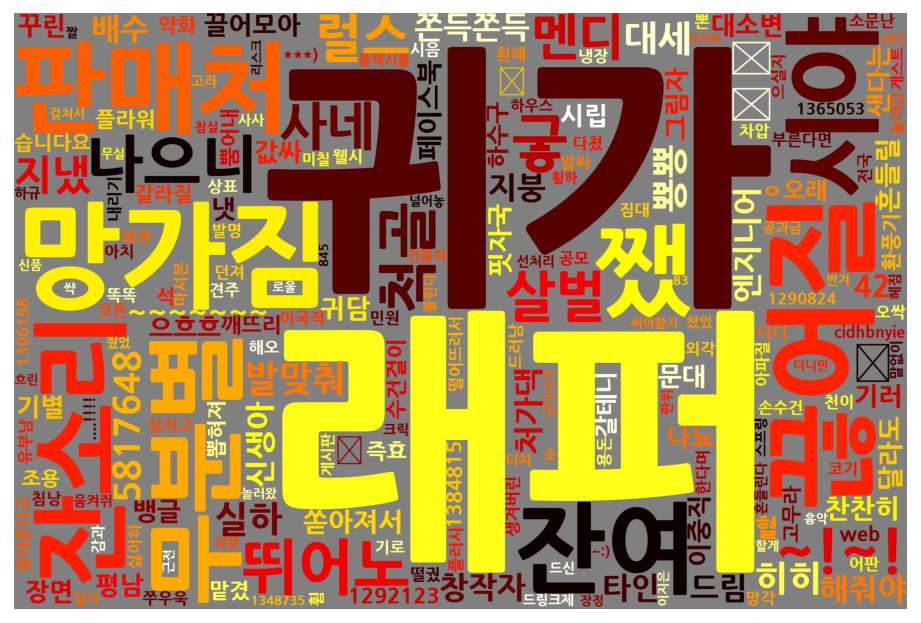

In [ ]:

plt.imshow(wordcloud) 

figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
plt.axis('off') 
plt.show()